# **Naive Bayes model for HMEQ Dataset**

In [1]:
from src import utilities
from src import evaluation

from sklearn.naive_bayes import GaussianNB

hmeq_dataset_path = '../../../datasets/preprocessed/hmeq/'

2023-03-12 00:49:06.896302: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 00:49:08.506938: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-12 00:49:08.507004: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-12 00:49:08.507011: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Model save_path: ../../../models/GNB/2023-03-12_00-49-09


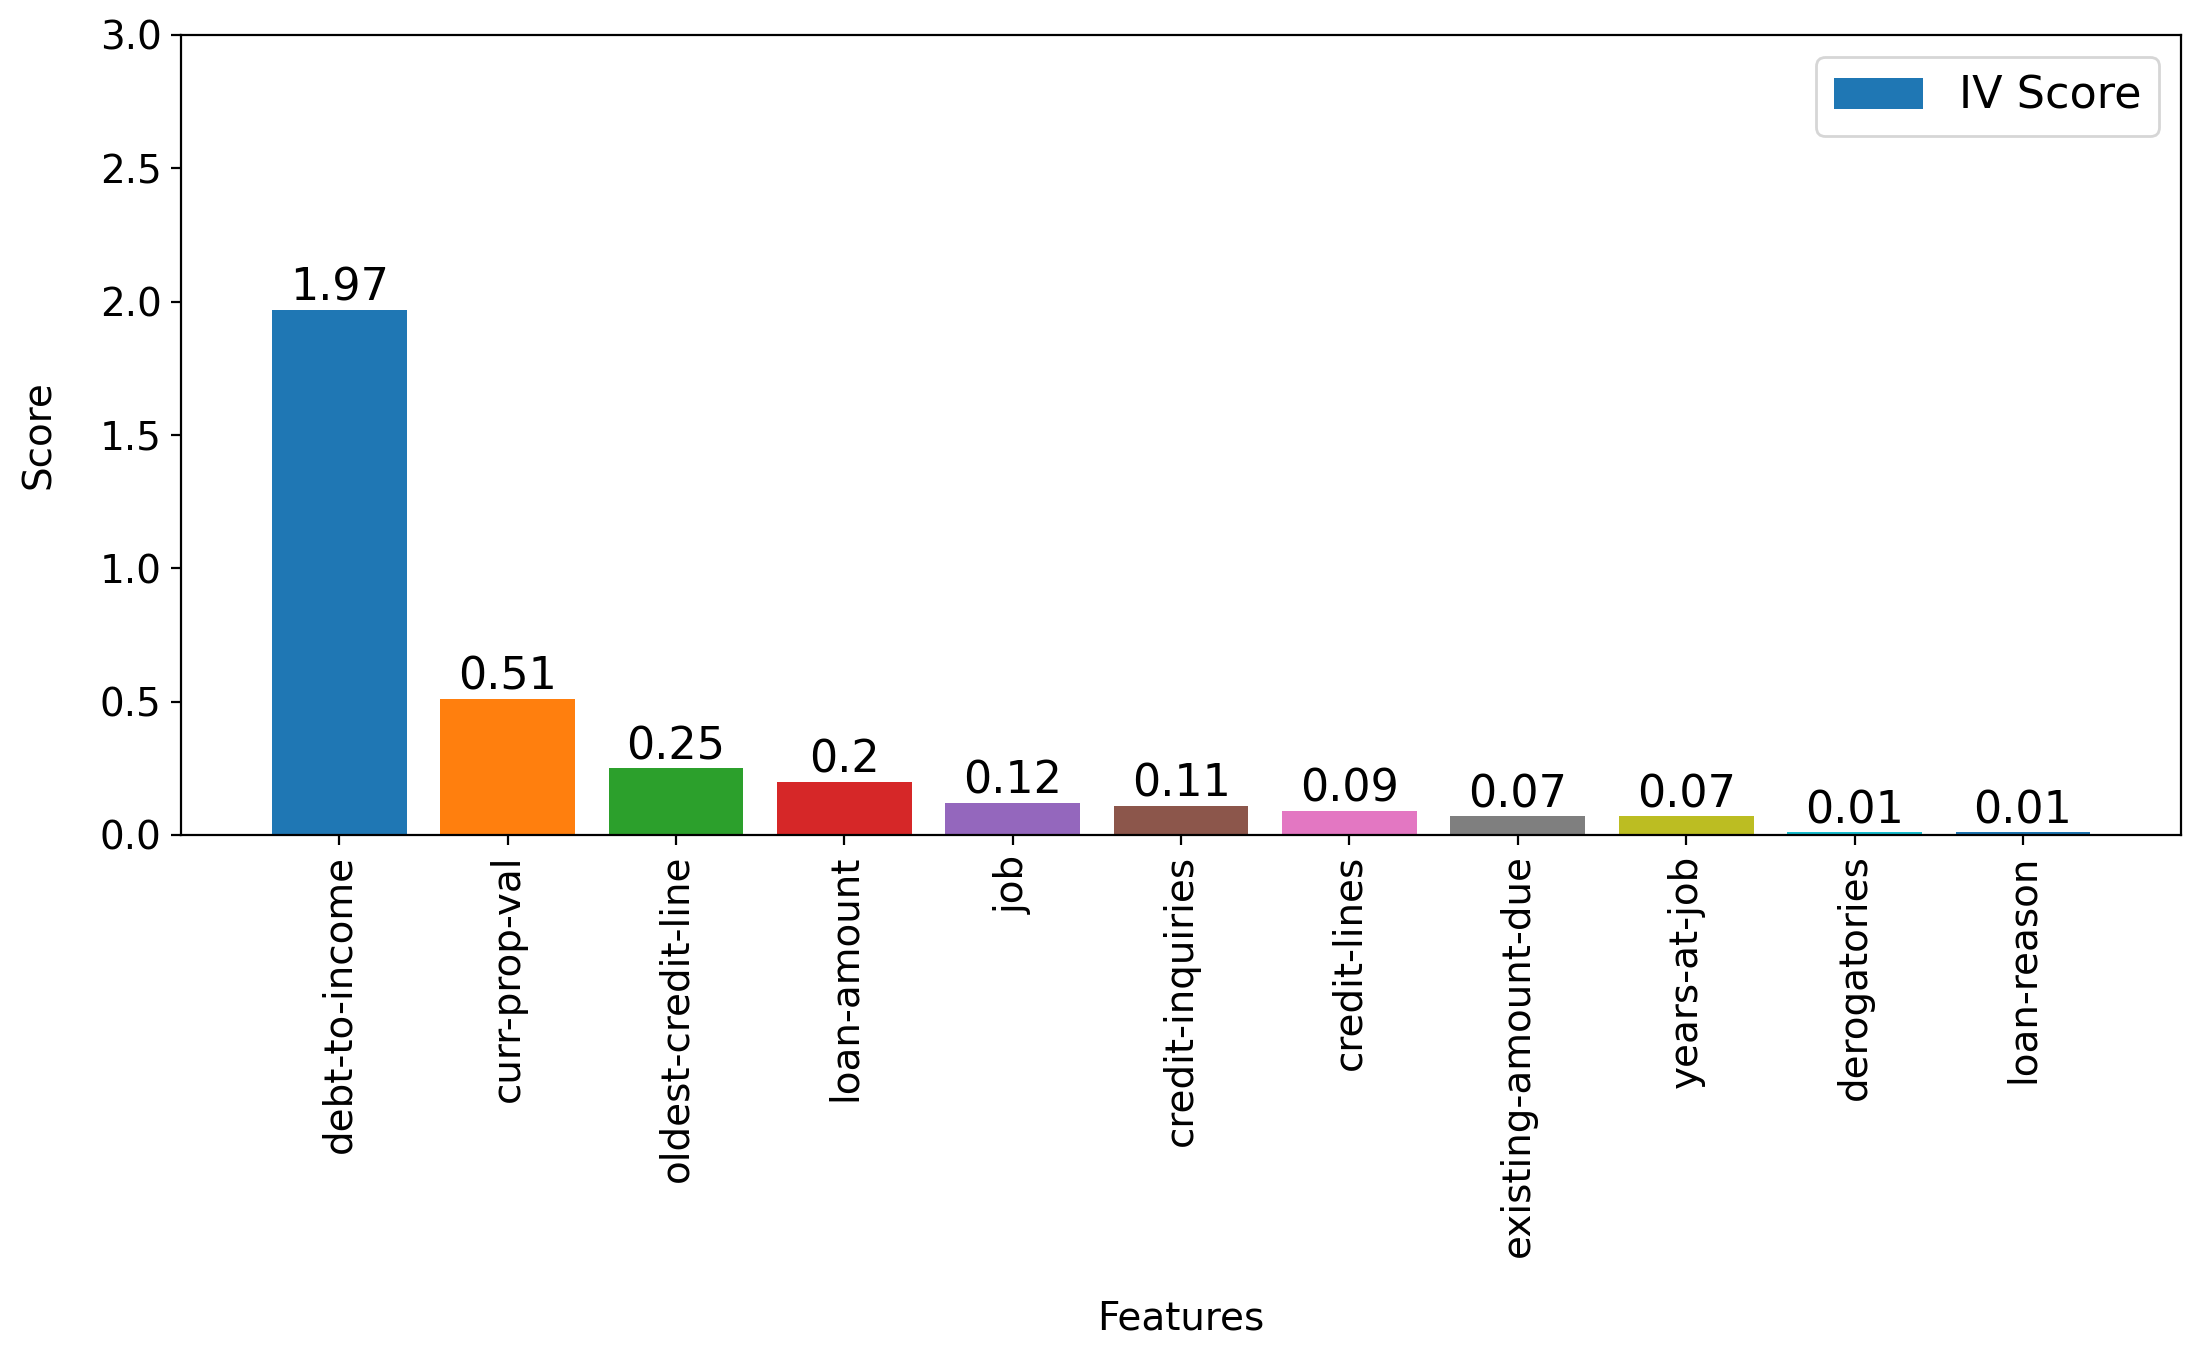

Selected Features: ['debt-to-income', 'curr-prop-val', 'oldest-credit-line', 'loan-amount', 'job', 'credit-inquiries', 'credit-lines', 'existing-amount-due', 'years-at-job', 'derogatories', 'loan-reason']


0it [00:00, ?it/s]

# **FOLD 1**

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3053
           1       0.61      0.61      0.61       761

    accuracy                           0.84      3814
   macro avg       0.75      0.76      0.75      3814
weighted avg       0.84      0.84      0.84      3814

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       764
           1       0.62      0.55      0.58       190

    accuracy                           0.84       954
   macro avg       0.76      0.73      0.74       954
weighted avg       0.84      0.84      0.84       954



# **FOLD 2**

2it [00:00, 18.16it/s]

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3053
           1       0.60      0.59      0.59       761

    accuracy                           0.84      3814
   macro avg       0.75      0.75      0.75      3814
weighted avg       0.84      0.84      0.84      3814

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       764
           1       0.59      0.66      0.62       190

    accuracy                           0.84       954
   macro avg       0.75      0.77      0.76       954
weighted avg       0.85      0.84      0.84       954



# **FOLD 3**

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3054
           1       0.60      0.61      0.61       760

    accuracy                           0.84      3814
   macro avg       0.75      0.76      0.75      3814
weighted avg       0.84      0.84      0.84      3814

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       763
           1       0.57      0.57      0.57       191

    accuracy                           0.83       954
   macro avg       0.73      0.73      0.73       954
weighted avg       0.83      0.83      0.83       954



# **FOLD 4**

4it [00:00, 18.13it/s]

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      3054
           1       0.61      0.62      0.61       761

    accuracy                           0.84      3815
   macro avg       0.76      0.76      0.76      3815
weighted avg       0.85      0.84      0.85      3815

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       763
           1       0.60      0.55      0.58       190

    accuracy                           0.84       953
   macro avg       0.75      0.73      0.74       953
weighted avg       0.83      0.84      0.84       953



# **FOLD 5**

5it [00:00, 18.18it/s]

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3054
           1       0.59      0.60      0.60       761

    accuracy                           0.84      3815
   macro avg       0.75      0.75      0.75      3815
weighted avg       0.84      0.84      0.84      3815

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       763
           1       0.62      0.67      0.65       190

    accuracy                           0.85       953
   macro avg       0.77      0.79      0.78       953
weighted avg       0.86      0.85      0.86       953



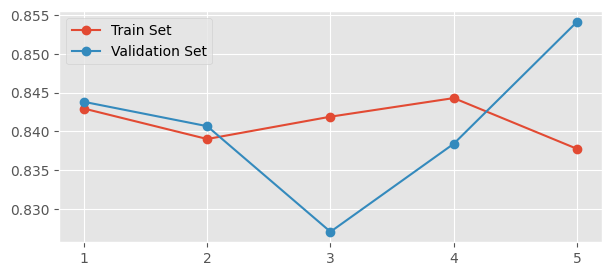

Average Train Set Accuracy: 0.8411808052144236
Average Validation Set Accuracy: 0.840816048185032


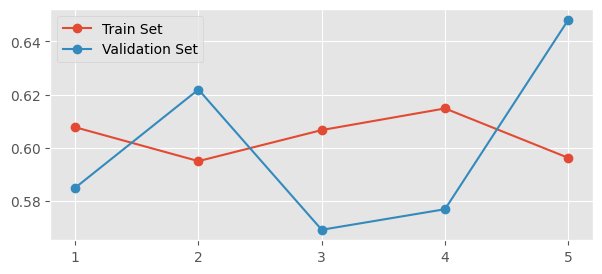

Average Train Set F1 Score: 0.6040741118353593
Average Validation Set F1 Score: 0.6002127415603863


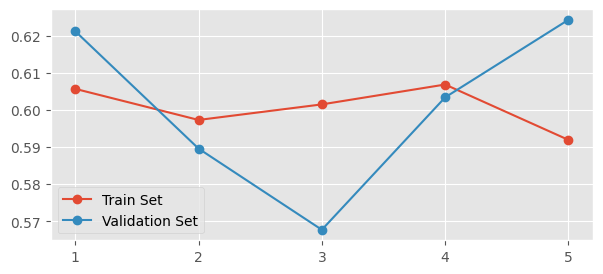

Average Train Set Precision: 0.600706127288386
Average Validation Set Precision: 0.6012942539510409


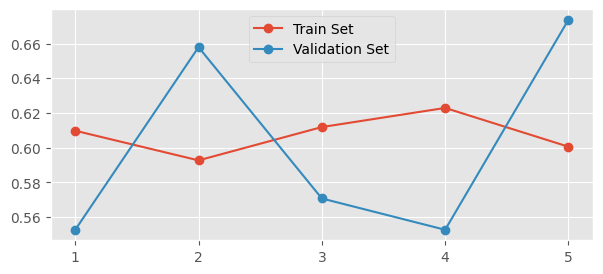

Average Train Set Recall: 0.6075195380040114
Average Validation Set Recall: 0.6015045467070819


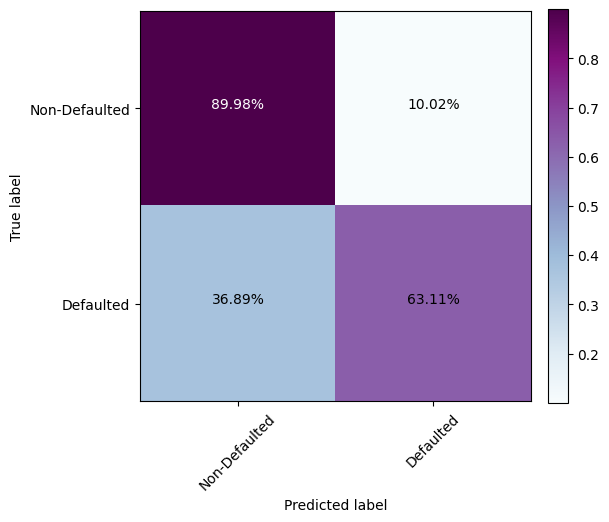

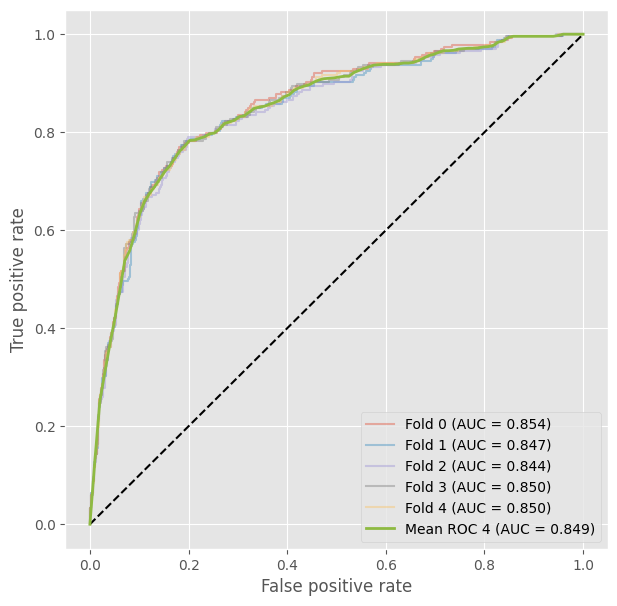

Gini derived from mean AUC 0.6976827094474154


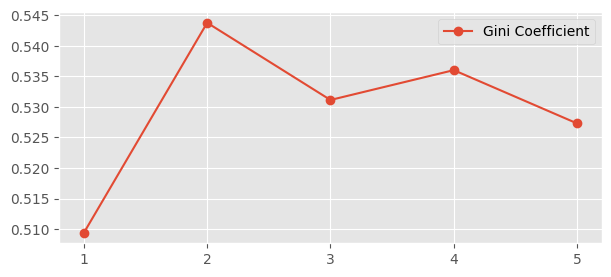

Average Gini Coefficient: 0.5295033736765147


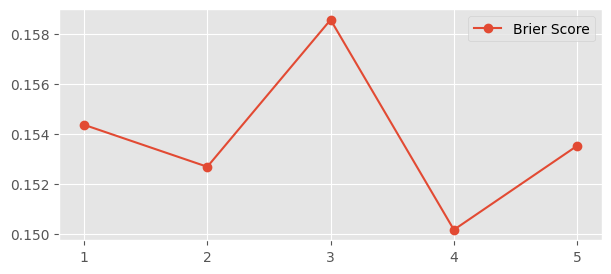

Average Brier Score: 0.15385906040268454


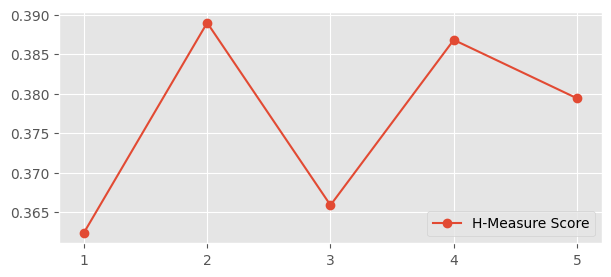

Average H-Measure Score: 0.3767087984822505


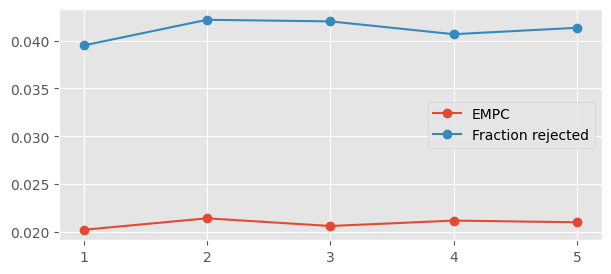

Average EMP: 0.020907542880951306
Average EMP Fractions: 0.04113781473807486


In [2]:
features_scores = utilities.read_features_scores(hmeq_dataset_path)
train_data = utilities.read_parquet(hmeq_dataset_path + 'train.parquet')
test_data = utilities.read_parquet(hmeq_dataset_path + 'test.parquet')

gnbc = GaussianNB()

evaluation.k_fold_cross_validate(clf=gnbc, layers=None, train_data=train_data,
                                 test_data=test_data, target='defaulted',
                                 classes=['Non-Defaulted', 'Defaulted'],
                                 k_folds=5, features_scores=features_scores,
                                 features=11, model_name='GNB', learning_rate=None,
                                 epochs=None, batch_size=None, verbose=True)